In [10]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pandas_datareader import data as pdr
import yfinance as yf
from datetime import datetime
from __future__ import division

In [11]:
#1.) What was the change in price of the stock over time?
#2.) What was the daily return of the stock on average?
#3.) What was the moving average of the various stocks?
#4.) What was the correlation between different stocks' closing prices?
#4.) What was the correlation between different stocks' daily returns?
#5.) How much value do we put at risk by investing in a particular stock?
#6.) How can we attempt to predict future stock behavior

In [12]:
yf.pdr_override()

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [13]:
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

In [14]:
for stock in tech_list:
    globals()[stock] = pdr.get_data_yahoo(stock,start,end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [15]:
AAPL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-12,142.699997,144.500000,141.059998,144.490005,143.686859,70462700
2022-12-13,149.500000,149.970001,144.240005,145.470001,144.661423,93886200
2022-12-14,145.350006,146.660004,141.160004,143.210007,142.413971,82291200
2022-12-15,141.110001,141.800003,136.029999,136.500000,135.741272,98931900
2022-12-16,136.690002,137.649994,133.729996,134.509995,133.762329,160156900
...,...,...,...,...,...,...
2023-12-04,189.979996,190.050003,187.449997,189.429993,189.429993,43389500
2023-12-05,190.210007,194.399994,190.179993,193.419998,193.419998,66628400
2023-12-06,194.449997,194.759995,192.110001,192.320007,192.320007,41089700


In [16]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-12,93.089996,93.875000,91.900002,93.559998,93.559998,27380900
2022-12-13,98.070000,99.800003,95.379997,95.849998,95.849998,34788500
2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500


In [17]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,168.921281,170.542560,167.575160,169.165880,168.696102,6.094663e+07
std,18.568182,18.393273,18.712125,18.529101,18.689874,1.866465e+07
min,126.010002,127.769997,124.169998,125.019997,124.325089,2.404830e+07
25%,153.782497,156.362503,152.997505,154.737495,153.936237,4.857445e+07
50%,173.240005,174.650002,172.035004,173.750000,173.476456,5.612015e+07
75%,182.757504,184.329998,181.559998,182.905003,182.664349,6.808168e+07
max,196.240005,198.229996,195.279999,196.449997,195.926956,1.601569e+08


In [18]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-12-12 to 2023-12-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


<Axes: xlabel='Date'>

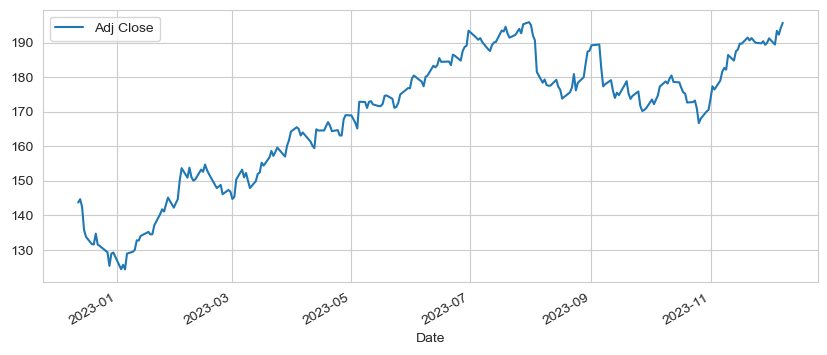

In [20]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

<Axes: xlabel='Date'>

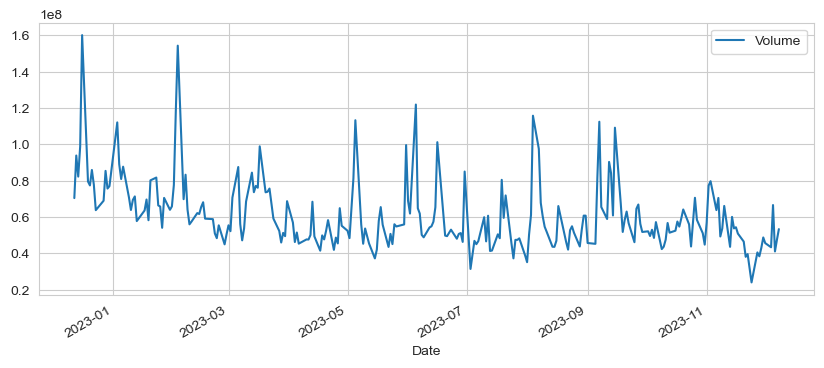

In [21]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [28]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = pd.Series.rolling(AAPL['Adj Close'],window=ma).mean()

<Axes: xlabel='Date'>

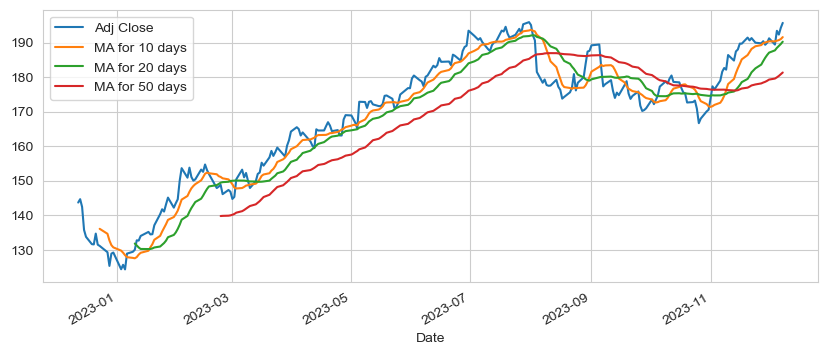

In [29]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(10,4))

<Axes: xlabel='Date'>

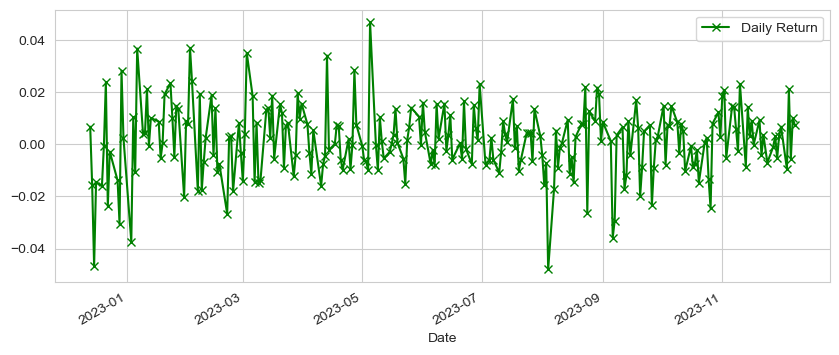

In [33]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot( legend=True, figsize=(10,4), linestyle="solid", marker='x', color='green')

C:\Users\Niko\AppData\Local\Temp\ipykernel_7488\23933038.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='salmon')


<Axes: xlabel='Daily Return', ylabel='Density'>

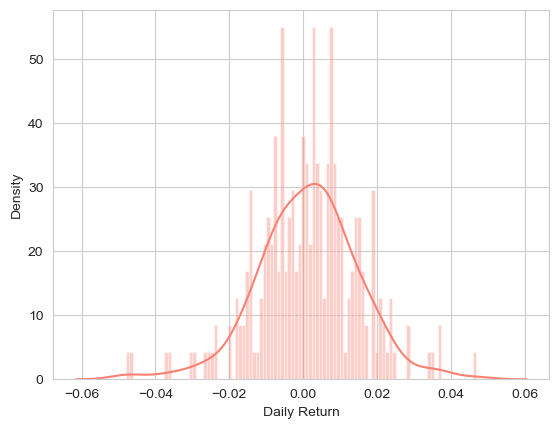

In [40]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='salmon')

In [47]:
closing_df = pdr.get_data_yahoo(tech_list, 'yahoo', start, end)['Adj Close']

[*********************100%%**********************]  4 of 4 completed


4 Failed downloads:
['GOOG', 'AMZN', 'MSFT', 'AAPL']: ValueError("time data 'yahoo' does not match format '%Y-%m-%d'")
